In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/dontw/Downloads/titanic-passengers.csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [80]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df["Embarked"].fillna('S',inplace=True)
df=df.drop(['Cabin'])
df['Age']=df['Age'].astype(int)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

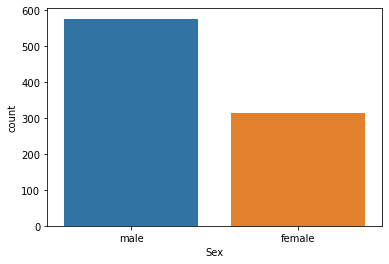

In [47]:
sns.countplot(x='Sex', data=df)
plt.xticks()

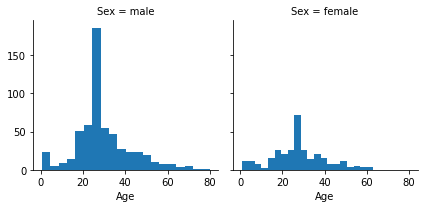

In [42]:
g=sns.FacetGrid(df, col="Sex")
g.map(plt.hist,'Age',bins=20)

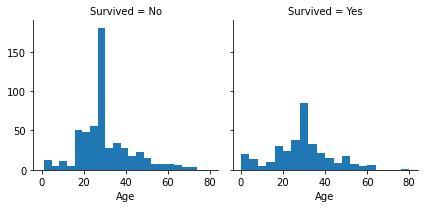

In [43]:
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Age',bins=20)

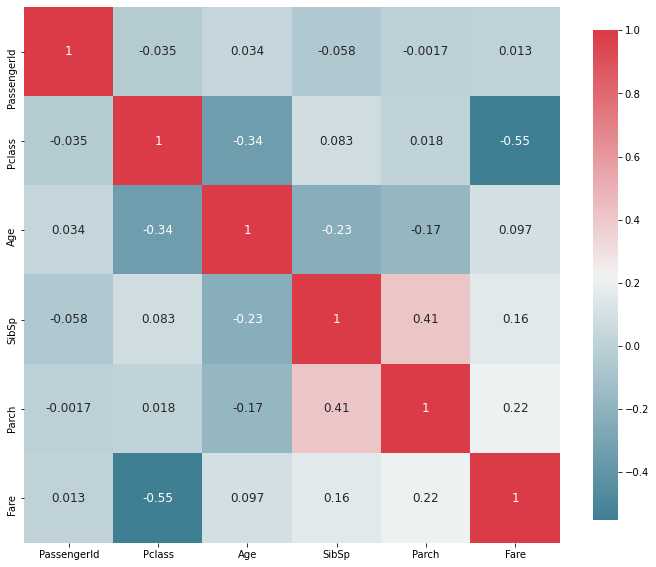

In [44]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={'shrink':.9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })
    
plot_correlation_map(df)

In [65]:
gk = df.groupby('Pclass')    
gk.first()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FS
Pclass,,,,,,,,,,,,
1,672,No,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.00,S,Mrs,2
2,343,No,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.00,S,Mrs,1
3,76,No,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.65,S,Mrs,1


In [59]:
def title(ch):
    return ch.split(', ')[1].split('. ')[0]

df["Title"]=df["Name"].map(title)

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

df["Title"]=df["Title"].map(Title_Dictionary)

df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [57]:
df["FS"]= df["Parch"] + df["SibSp"] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FS
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,S,Mrs,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,S,Mrs,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,S,Mrs,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,S,Mrs,5
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,Mrs,2
887,61,No,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,C,Mrs,1
888,535,No,3,"Cacic, Miss. Marija",female,30,0,0,315084,8.6625,S,Miss,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28,0,0,349215,7.8958,S,Mrs,1
